## Gradient Descent
Por John Osorio C.C. 1035435726

### Ajuste inicial

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]


In [9]:
#this method returns theta0, theta1, MSE, MAE and MAPE for a given alpha

def vals_alpha(alpha, theta_0, theta_1, epochs):
    #Initial parameters
    m = len(X)
    MSE = [] #array to store MSE values
    MAE = []
    MAPE = []
    for i in range(epochs): 
        #hypothesis
        hx = theta_1*X + theta_0
        #calculating errors with formula
        MSE.append(1/(m)*np.sum((hx - Y)**2))
        MAE.append(1/(m)*np.sum(abs(hx-Y)))
        MAPE.append(100/m*np.sum(abs((hx-Y)/Y)))
        #calculating parameters
        d_theta0 = -1/m * np.sum(Y - hx)
        d_theta1 = -1/m * np.sum((Y - hx)*X)
        #updating values
        theta_0 = theta_0 - alpha*d_theta0
        theta_1 = theta_1 - alpha*d_theta1
    return theta_0, theta_1, MSE, MAE, MAPE

In [10]:
#LM fitting
def func(x, a1, a0):
    return a1 * x + a0

theta_1 = 10     # initial values of   
theta_0 = 10     # y=theta_1*x + theta_0  
p0 = [theta_1, theta_0]
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, X, Y, p0, method='lm')

Text(0.5, 1.0, 'MAPE evolution')

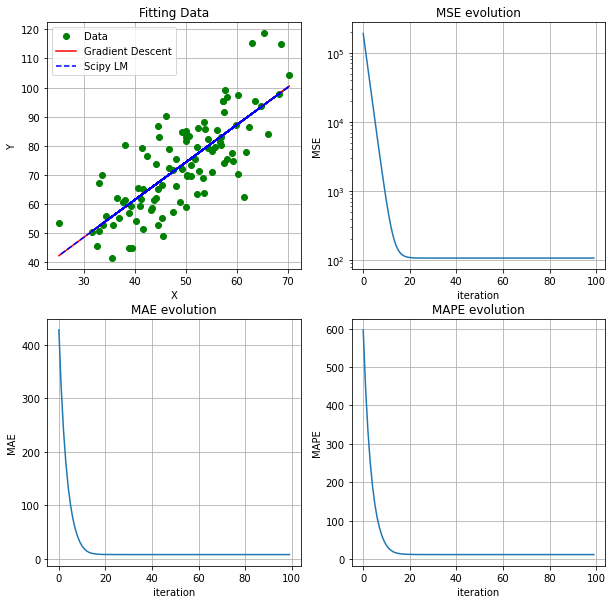

In [11]:
alpha = 0.0001   # The learning Rate  
theta_1 = 10     # initial values of   
theta_0 = 10     # y=theta_1*x + theta_0  
epochs = 100     # The number of iterations  
theta_0, theta_1, MSE, MAE, MAPE = vals_alpha(alpha, theta_0, theta_1, epochs)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
#plotting data
axs[0, 0].plot(X, Y, 'go', label="Data")
axs[0, 0].plot(X, theta_1*X + theta_0, 'r-', label="Gradient Descent")
axs[0, 0].plot(X, popt[0]*X + popt[1],'b--', label="Scipy LM")
axs[0, 0].set_xlabel("X")
axs[0, 0].set_ylabel("Y")
axs[0, 0].grid(True)
axs[0, 0].set_title("Fitting Data")
axs[0, 0].legend(loc = 0)
#plotting errors 
iterations = range(epochs)
#using log scale in y axis because the values are too big
axs[0, 1].semilogy(iterations, MSE)
axs[0, 1].set_ylabel("MSE")
axs[0, 1].set_xlabel("iteration")
axs[0, 1].grid(True)
axs[0, 1].set_title("MSE evolution")

axs[1, 0].plot(iterations, MAE)
axs[1, 0].set_ylabel("MAE")
axs[1, 0].set_xlabel("iteration")
axs[1, 0].grid(True)
axs[1, 0].set_title("MAE evolution")


axs[1, 1].plot(iterations, MAPE)
axs[1, 1].set_ylabel("MAPE")
axs[1, 1].set_xlabel("iteration")
axs[1, 1].grid(True)
axs[1, 1].set_title("MAPE evolution")


### Variation of $\alpha$

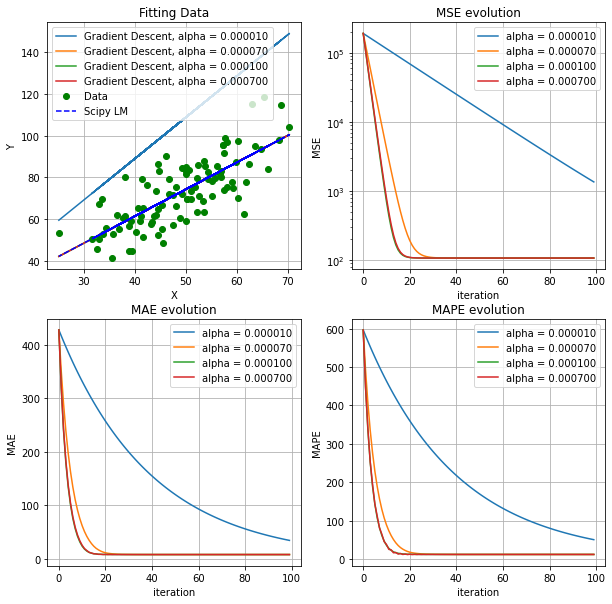

In [13]:
alpha_arr = [0.00001, 0.00007, 0.0001, 0.0007]   # The learning Rate  

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
epochs = 100     # The number of iterations  
iterations = range(epochs)
for alpha in alpha_arr: 
    theta_1 = 10     # initial values of   
    theta_0 = 10     # y=theta_1*x + theta_0  

    theta_0, theta_1, MSE, MAE, MAPE = vals_alpha(alpha, theta_0, theta_1, epochs)    
    #plotting data
    
    axs[0, 0].plot(X, theta_1*X + theta_0, label="Gradient Descent, alpha = %0f"%alpha)
    #plotting errors 
   
    #using log scale in y axis because the values are too big
    axs[0, 1].semilogy(iterations, MSE, label="alpha = %f"%alpha)  
    axs[1, 0].plot(iterations, MAE, label="alpha = %f"%alpha)   
    axs[1, 1].plot(iterations, MAPE, label="alpha = %f"%alpha)
    
axs[0, 0].plot(X, Y, 'go', label="Data")
axs[0, 0].plot(X, popt[0]*X + popt[1],'b--', label="Scipy LM")
axs[0, 0].set_xlabel("X")
axs[0, 0].set_ylabel("Y")
axs[0, 0].grid(True)
axs[0, 0].set_title("Fitting Data")
axs[0, 0].legend(loc = 0)

axs[0, 1].set_ylabel("MSE")
axs[0, 1].set_xlabel("iteration")
axs[0, 1].grid(True)
axs[0, 1].set_title("MSE evolution")
axs[0, 1].legend(loc = 0)

axs[1, 0].set_ylabel("MAE")
axs[1, 0].set_xlabel("iteration")
axs[1, 0].grid(True)
axs[1, 0].set_title("MAE evolution")
axs[1, 0].legend(loc = 0)

axs[1, 1].set_ylabel("MAPE")
axs[1, 1].set_xlabel("iteration")
axs[1, 1].grid(True)
axs[1, 1].set_title("MAPE evolution")
axs[1, 1].legend(loc = 0)
